In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
with open("diabetes.txt") as file:
    reader = csv.reader(file, delimiter=' ')
    table = np.asarray([row for row in reader], dtype=np.float)
X_train = table[:200, :10]
Y_train = table[:200, 10]
X_test = table[200:, :10]
Y_test = table[200:, 10]

In [7]:
#Feature augmentation(Bias term)
X_train = np.insert(X_train, 10, values=1, axis=1)
X_test = np.insert(X_test, 10, values=1, axis=1)

In [22]:
#No regularization
left = np.dot(X_train.T, X_train)
right = np.dot(X_train.T, Y_train)
w_plain = np.linalg.solve(left, right)

In [44]:
#With regularization
lamdas = []
ws_ridge = []
for i in range(-20,11):
    lamdas.append(2**i)
for j in range(len(lamdas)):
    left = np.dot(X_train.T, X_train) + lamdas[j] * np.eye(len(X_train.T))
    ws_ridge.append(np.linalg.solve(left, right))

In [85]:
#Evaluation
Y_pred_plain = np.dot(X_test, w_plain)
test_error_plain = np.mean((Y_pred_plain - Y_test)**2)

test_error_ridge = []
for i in range(len(ws_ridge)):
    Y_pred_ridge = np.dot(ws_ridge[i], X_test.T)
    test_error_ridge.append(np.mean((Y_pred_ridge - Y_test)**2))
print ("plain(without regularization) test error: ", test_error_plain, "\nridge: ", test_error_ridge[0])

plain(without regularization) test error:  3129.65437754 
ridge:  3129.64930918


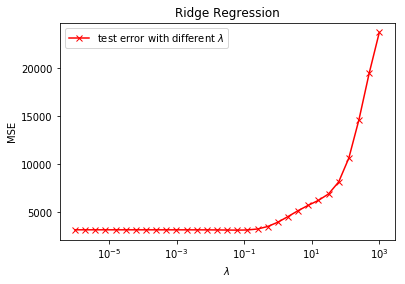

In [96]:
#Plot
plt.figure()    
plt.plot(lamdas, test_error_ridge,'-x', c='r')
plt.xlabel('$\lambda$')
plt.xscale('log')
plt.legend(['test error with different $\lambda$'])
plt.ylabel('MSE')
plt.title('Ridge Regression')
plt.show()